# Assignment: Gooey.AI

### Author : Harjinder Singh

### Importing dataset

I am using pandas to load the json dataset from url.

In [2]:
import pandas as pd

json_dataset_url = "https://storage.googleapis.com/dara-c1b52.appspot.com/daras_ai/media/c2809a08-141b-11ee-b6c2-8e93953183bb/gooey_inferences.json"
dataset = pd.read_json(json_dataset_url)

# sample data rows
dataset.head()

,is_anonymous,recipe,run_id,user_id,timestamp
0,True,DeforumSD,dc158e8add22da7690cd35efe6f1c0ef6a43932868b895...,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03-05 21:17:17.679325
1,True,DeforumSD,f4ccb9bda8dd1de76c9ca279e16a2a99606f65f885d83e...,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03-05 21:18:00.957005
2,True,DeforumSD,8acb002ac4d5185a4333486dc8e6a1d38d89ef7ec7b8fe...,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03-05 21:18:24.693359
3,True,DeforumSD,8a79563f0d60e8738bd0d6bf9a5a60e63cb46f9a8a5059...,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03-05 21:17:57.277849
4,True,DeforumSD,df848e52c0a00279ebf805912f2b719486a16e347d55fd...,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03-05 21:18:05.409089


Checking basic information of dataset like column names, datatypes, value counts

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202757 entries, 0 to 202756
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   is_anonymous  202757 non-null  bool          
 1   recipe        202757 non-null  object        
 2   run_id        202757 non-null  object        
 3   user_id       202757 non-null  object        
 4   timestamp     202757 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), object(3)
memory usage: 6.4+ MB


In [4]:
# shape of our dataset
dataset.shape



(202757, 5)

Since there are no null values present in the dataset we can move forward with our data.

### Task

Draw a retention chart, which shows the month-on-month retention of users, based on whether they ran an inference on a particular month or not.

In [5]:
dataset['month'] = dataset.timestamp.dt.strftime('%Y-%m')
dataset.head(3)

,is_anonymous,recipe,run_id,user_id,timestamp,month
0,True,DeforumSD,dc158e8add22da7690cd35efe6f1c0ef6a43932868b895...,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03-05 21:17:17.679325,2023-03
1,True,DeforumSD,f4ccb9bda8dd1de76c9ca279e16a2a99606f65f885d83e...,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03-05 21:18:00.957005,2023-03
2,True,DeforumSD,8acb002ac4d5185a4333486dc8e6a1d38d89ef7ec7b8fe...,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03-05 21:18:24.693359,2023-03


In [6]:
# take only the required data, for calculating user retenstion rate
data = dataset[['user_id','month']]
data.head()

,user_id,month
0,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03
1,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03
2,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03
3,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03
4,e02d31832fdba9afd55b6e2107e097124b7ddc28d6e6ea...,2023-03


In [7]:
set(data.month.to_list())

{'1970-01',
 '2022-12',
 '2023-01',
 '2023-02',
 '2023-03',
 '2023-04',
 '2023-05',
 '2023-06'}

In [8]:
# Group the users based on month and calculate unique users visited on that monoth

grouped_data = data.groupby('month').agg(unique_users=('user_id','nunique'))
grouped_data = grouped_data.reset_index()
grouped_data.head(12)

,month,unique_users
0,1970-01,149
1,2022-12,79
2,2023-01,452
3,2023-02,916
4,2023-03,2379
5,2023-04,6147
6,2023-05,7962
7,2023-06,10442


Retention of users will be calculated based on percentage of users for each month as compared to previous month

In [9]:
grouped_data['last_month_users'] = grouped_data['unique_users'].shift(1).fillna(0)
grouped_data.head(12)

,month,unique_users,last_month_users
0,1970-01,149,0.0
1,2022-12,79,149.0
2,2023-01,452,79.0
3,2023-02,916,452.0
4,2023-03,2379,916.0
5,2023-04,6147,2379.0
6,2023-05,7962,6147.0
7,2023-06,10442,7962.0


In [26]:
def calculate_retention(row):
    if row['last_month_users'] > 0:
        return (row['unique_users'] / row['last_month_users']) * 100
    return 0

grouped_data['retention_rate'] = grouped_data.apply(calculate_retention, axis=1)
grouped_data.head(12)

,month,unique_users,last_month_users,retention_rate
0,1970-01,149,0.0,0.000000
1,2022-12,79,149.0,53.020134
2,2023-01,452,79.0,572.151899
3,2023-02,916,452.0,202.654867
4,2023-03,2379,916.0,259.716157
5,2023-04,6147,2379.0,258.385876
6,2023-05,7962,6147.0,129.526598
7,2023-06,10442,7962.0,131.147953


### Ploting retention percentage with line char

<ipython-input-30-206858c86899>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


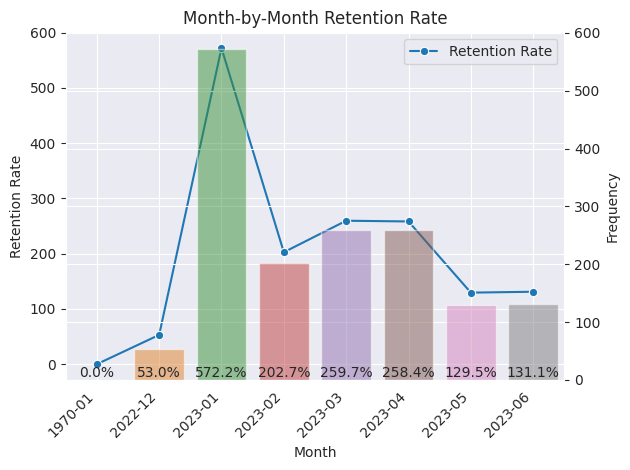

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot line plot
sns.lineplot(x='month', y='retention_rate', data=grouped_data, marker='o', ax=ax1)

# Set x-axis label rotation to 45 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add legends
ax1.legend(labels=['Retention Rate'])

# Add secondary y-axis for the histogram
ax2 = ax1.twinx()

# Plot histogram with transparency
sns.barplot(data=grouped_data, x='month', y='retention_rate', ax=ax2,  alpha=0.5)

# Set secondary y-axis label
ax2.set_ylabel('Frequency')

# Display the values at the bottom of each histogram bar
for i, val in enumerate(grouped_data['retention_rate']):
    ax2.text(i, 0, f'{val:.1f}%', ha='center', va='bottom')

# Set plot title and labels
plt.title('Month-by-Month Retention Rate')
ax1.set_xlabel('Month')
ax1.set_ylabel('Retention Rate')

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.savefig('month_by_month_retention_rate.png')
plt.show()

Above is the plotting for user retension.

### How we calculated retentions.

- Took unique user visits for each month say **X**
- For each month, number of user visited previous month say **Y**
- Retention rate = `(X/Y)*100`

<ipython-input-31-c63bd88aa04f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


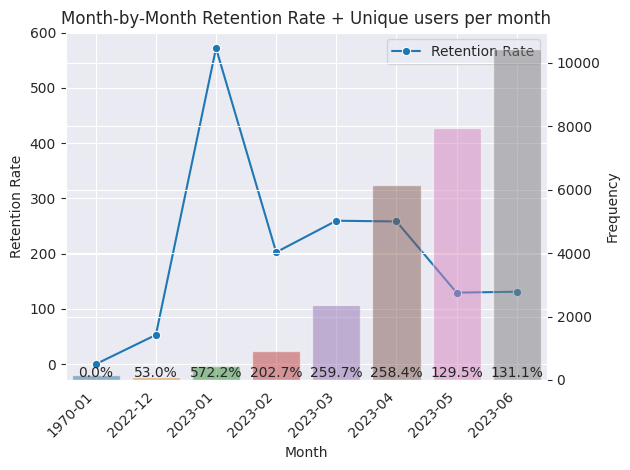

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot line plot
sns.lineplot(x='month', y='retention_rate', data=grouped_data, marker='o', ax=ax1)

# Set x-axis label rotation to 45 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add legends
ax1.legend(labels=['Retention Rate'])

# Add secondary y-axis for the histogram
ax2 = ax1.twinx()

# Plot histogram with transparency
sns.barplot(data=grouped_data, x='month', y='unique_users', ax=ax2,  alpha=0.5)

# Set secondary y-axis label
ax2.set_ylabel('Frequency')

# Display the values at the bottom of each histogram bar
for i, val in enumerate(grouped_data['retention_rate']):
    ax2.text(i, 0, f'{val:.1f}%', ha='center', va='bottom')

# Set plot title and labels
plt.title('Month-by-Month Retention Rate + Unique users per month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Retention Rate')

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.savefig('month_by_month_retention_rate_and_users.png')
plt.show()